In [1]:
import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras

In [2]:
#loading microstructures and masks
path = 'C:\\Users\\kevin\\Desktop\\CMS\\Steel Image\\data\\'
inputs = []
masks=[]
for image in os.listdir(path+'images'):
    img = cv2.imread(path+'images\\'+image, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128,128))
    inputs.append(img)
    
inputs = np.array(inputs)
inputs = inputs/255
inputs = np.expand_dims(inputs, axis=-1)

for image in os.listdir(path+'masks'):
    img = cv2.imread(path+'masks\\'+image, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128,128))
    masks.append(img)
    
masks = np.array(masks)
masks = masks/255
masks = np.expand_dims(masks, axis=-1)

In [3]:
#normalizing data
masks.shape

(12, 128, 128, 1)

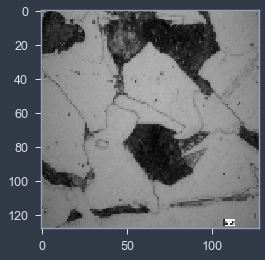

In [4]:
plt.imshow(np.squeeze(inputs[0]), cmap = 'gray')

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape, Conv2D
from tensorflow.keras.optimizers import SGD

In [6]:
28*28

784

In [7]:
def down_block(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    p = keras.layers.MaxPool2D((2, 2), (2, 2))(c)
    return c, p

def up_block(x, skip, filters, kernel_size=(3, 3), padding="same", strides=1):
    us = keras.layers.UpSampling2D((2, 2))(x)
    concat = keras.layers.Concatenate()([us, skip])
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(concat)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

def bottleneck(x, filters, kernel_size=(3, 3), padding="same", strides=1):
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(x)
    c = keras.layers.Conv2D(filters, kernel_size, padding=padding, strides=strides, activation="relu")(c)
    return c

In [8]:
def UNet():
    f = [16, 32, 64, 128, 256]
    inputs = keras.layers.Input((128, 128, 1))
    
    p0 = inputs
    c1, p1 = down_block(p0, f[0]) #128 -> 64
    c2, p2 = down_block(p1, f[1]) #64 -> 32
    c3, p3 = down_block(p2, f[2]) #32 -> 16
    c4, p4 = down_block(p3, f[3]) #16->8
    
    bn = bottleneck(p4, f[4])
    
    u1 = up_block(bn, c4, f[3]) #8 -> 16
    u2 = up_block(u1, c3, f[2]) #16 -> 32
    u3 = up_block(u2, c2, f[1]) #32 -> 64
    u4 = up_block(u3, c1, f[0]) #64 -> 128
    
    outputs = keras.layers.Conv2D(1, (1, 1), padding="same", activation="sigmoid")(u4)
    model = keras.models.Model(inputs, outputs)
    return model

In [9]:
model = UNet()
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["acc"])
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 128, 1) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 128, 128, 16) 160         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 128, 128, 16) 2320        conv2d[0][0]                     
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 64, 64, 16)   0           conv2d_1[0][0]                   
______________________________________________________________________________________________

In [10]:
model.fit(inputs, masks, epochs=50)

Train on 12 samples
Epoch 1/50
12/12 [==============================] - 4s 349ms/sample - loss: 0.7068 - acc: 0.1670
Epoch 2/50
12/12 [==============================] - 2s 146ms/sample - loss: 0.6980 - acc: 0.1754
Epoch 3/50
12/12 [==============================] - 2s 136ms/sample - loss: 0.6937 - acc: 0.2411
Epoch 4/50
12/12 [==============================] - 2s 136ms/sample - loss: 0.6913 - acc: 0.7412
Epoch 5/50
12/12 [==============================] - 2s 133ms/sample - loss: 0.6898 - acc: 0.7534
Epoch 6/50
12/12 [==============================] - 2s 141ms/sample - loss: 0.6888 - acc: 0.7550
Epoch 7/50
12/12 [==============================] - 2s 140ms/sample - loss: 0.6876 - acc: 0.7554
Epoch 8/50
12/12 [==============================] - 2s 156ms/sample - loss: 0.6858 - acc: 0.7547
Epoch 9/50
12/12 [==============================] - 2s 138ms/sample - loss: 0.6836 - acc: 0.7544
Epoch 10/50
12/12 [==============================] - 2s 153ms/sample - loss: 0.6807 - acc: 0.7544
Epoch 11/

KeyboardInterrupt: 

In [ ]:
passed_images = inputs[:11]

In [ ]:
constructed_masks = model(passed_images)

In [ ]:
n=2
print('ORIGINAL IMAGE')
plt.imshow(np.squeeze(inputs[n]), cmap='gray')
plt.show()

print('REAL MASK')
plt.imshow(np.squeeze(masks[n]), cmap='gray')
plt.show()

print('CONSTRUCTED MASK')
plt.imshow(np.squeeze(constructed_masks[n]), cmap='gray')

In [ ]:
test_path = 'C:\\Users\\kevin\\Desktop\\CMS\\Steel Image\\sample dataset\\20_AR_Long_400x.jpg'

In [ ]:
test =[]
img = cv2.imread(test_path, cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (128,128))
test.append(img)
    
test = np.array(test)
test = test/255
test = np.expand_dims(test, axis=-1)

In [ ]:
test.shape

In [ ]:
prediction = model.predict(test)
plt.imshow(np.squeeze(prediction[0]), cmap='gray')
plt.show()


plt.imshow(np.squeeze(test[0]), cmap='gray')